In [36]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

from numpy import dot

from numpy.linalg import norm

# Let’s take a quick look at the datasets:

In [37]:
data = pd.read_csv("ecommerce.csv",encoding= 'unicode_escape')
# unicode escape in python tells to consider quotes inside a string as normal data and not consider it as string termination.
data_copy = data.copy()
data = data.dropna()

In [38]:
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

# Analysing the data

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [40]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Lets create pivot table
pivot table turns the data to view it from different perspectives.

In [41]:
e_features = data.pivot_table(index="Description",columns="CustomerID",values="Quantity").fillna(0)
e_features.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50'S CHRISTMAS GIFT BAG LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DOLLY GIRL BEAKER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I LOVE LONDON MINI BACKPACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I LOVE LONDON MINI RUCKSACK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Converting pivot table into Array matrix

In [42]:
from scipy.sparse import csr_matrix

e_features_matrix = csr_matrix(e_features.values)


# KNN
Using cosine similarity to get the similarities between the products

In [43]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric="cosine",algorithm="brute")
model_knn.fit(e_features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [44]:
e_features.shape

(3896, 4372)

# selecting an item name to make recommendation

In [45]:
ITEM_NAME = "WHITE METAL LANTERN"

query_index = 0
for data in e_features.index:
    
    if ITEM_NAME.lower().strip() in data.lower():
        print(query_index)
        break
    query_index += 1


3724


In [46]:
print(query_index)
distance , indices = model_knn.kneighbors(e_features.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

3724


# Make Recommendation

In [47]:
for i in range(0, len(distance.flatten())):
    if i == 0:
        print("Recommendation for {0}:\n".format(e_features.index[query_index]))
    else:
        print("{0}:{1}, with distance of {2}:".format(i,e_features.index[indices.flatten()[i]],distance.flatten()[i]))

Recommendation for WHITE METAL LANTERN:

1: 50'S CHRISTMAS GIFT BAG LARGE, with distance of 0.36926943483558705:
2: RED SPOT GIFT BAG LARGE, with distance of 0.3750455878480734:
3:LOVE HOT WATER BOTTLE, with distance of 0.37670872260838584:
4:EGG CUP HENRIETTA HEN CREAM , with distance of 0.3807696153667398:
5:WRAP, BILLBOARD FONTS DESIGN, with distance of 0.3932243402231279:


# Selecting a random product to give recommendation

In [48]:
query_index = np.random.choice(e_features.shape[0])
print(query_index)
distance , indices = model_knn.kneighbors(e_features.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

3713


# Let’s Make Some product Recommendations

In [49]:
selected_item = e_features.index[query_index]
all_knn_recommended = []

for i in range(0, len(distance.flatten())):
    if i == 0:
        print("Recommendation for {0}:\n".format(e_features.index[query_index]))
    else:
        print("{0}:{1}, with distance of {2}:".format(i,e_features.index[indices.flatten()[i]],distance.flatten()[i]))

    all_knn_recommended.append(e_features.index[indices.flatten()[i]])

Recommendation for WHITE GOOSE FEATHER TREE 60CM :

1:PINK GOOSE FEATHER TREE 60CM, with distance of 0.46551692448046256:
2:GREEN GOOSE FEATHER CHRISTMAS TREE , with distance of 0.5079271097787478:
3:BLUE CHENILLE SHAGGY CUSHION COVER , with distance of 0.5575543920251773:
4:WHITE GOOSE FEATHER CHRISTMAS TREE , with distance of 0.5676324236180723:
5:MIRRORED WALL ART TABLE LAMP, with distance of 0.6621595501939357:


In [50]:
data_copy = data_copy.dropna()

## Calculating overall performance based on similarity

In [51]:
average_similarity_knn = []
Euclidean_knn = []

select_song_features = data_copy[data_copy.Description == selected_item].drop(columns=['InvoiceNo','StockCode','Description','InvoiceDate','Country']).values[0]

for item in all_knn_recommended:
    recommended_song_feature = data_copy[data_copy.Description == item].drop(columns=['InvoiceNo','StockCode','Description','InvoiceDate','Country']).values[0]

    result = dot(select_song_features, recommended_song_feature)/(norm(select_song_features)*norm(recommended_song_feature))
    average_similarity_knn.append(result)
    dist = np.linalg.norm(recommended_song_feature - select_song_features)
    Euclidean_knn.append(dist)
  

print("Average Similarity KNN:", sum(average_similarity_knn)/len(average_similarity_knn))

Average Similarity KNN: 0.999999899914684


# Distance

In [52]:
print("Diversity in KNN:",np.mean(Euclidean_knn).round(2))

Diversity in KNN: 1053.84


# Artificial Neural Network

In [53]:
data = pd.read_csv("ecommerce.csv",encoding= 'unicode_escape')
# unicode escape in python tells to consider quotes inside a string as normal data and not consider it as string termination.
data = data.dropna()

In [54]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['StockCode']= label_encoder.fit_transform(data['StockCode'])
  
data['StockCode'].unique()

array([3249, 2649, 2855, ..., 3675, 3475, 2403])

In [55]:
# data = data.head(1000)
ratings = data.drop(columns=["InvoiceNo","InvoiceDate","UnitPrice","Description","Country"])

In [56]:
ratings = ratings.drop_duplicates()
ratings = ratings.dropna()

In [57]:
data_ann_copy = data.copy()
data_ann_copy = data_ann_copy.dropna()
ratings.head()

,StockCode,Quantity,CustomerID
0,3249,6,17850.0
1,2649,6,17850.0
2,2855,8,17850.0
3,2803,6,17850.0
4,2802,6,17850.0


In [58]:
user_ids = data["CustomerID"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
item_ids = data["StockCode"].unique().tolist()
item2item_encoded = {x: i for i, x in enumerate(item_ids)}
item_encoded2item = {i: x for i, x in enumerate(item_ids)}
data["user"] = data["CustomerID"].map(user2user_encoded)
data["item"] = data["StockCode"].map(item2item_encoded)

num_users = len(user2user_encoded)
num_items = len(item_encoded2item)
data["Quantity"] = data["Quantity"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(data["Quantity"])
max_rating = max(data["Quantity"])

In [59]:
# data = data.sample(frac=0.01, random_state=42)
x = data[["CustomerID", "StockCode"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = data["Quantity"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [60]:
EMBEDDING_SIZE = 50 # length of features to be used by ANN


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs) # parent class we are calling to use, shouldn't modify
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

model = RecommenderNet(num_users, num_items, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [61]:
ratings

,StockCode,Quantity,CustomerID
0,3249,6,17850.0
1,2649,6,17850.0
2,2855,8,17850.0
3,2803,6,17850.0
4,2802,6,17850.0
...,...,...,...
541890,964,8,13113.0
541894,1488,12,12680.0
541904,1470,12,12680.0
541907,2087,4,12680.0


In [62]:
# Let us get a user and see the top recommendations.
user_id = ratings.CustomerID.sample(1).iloc[0]
items_purchased_by_user = ratings[ratings.CustomerID == user_id]

items_not_purchased = ratings[ratings.CustomerID != user_id]['StockCode']

items_not_purchased = list(
    set(items_not_purchased).intersection(set(item2item_encoded.keys()))
)
items_not_purchased = [[item2item_encoded.get(x)] for x in items_not_purchased]

user_encoder = user2user_encoded.get(user_id)
user_item_array = np.hstack(
    ([[user_encoder]] * len(items_not_purchased), items_not_purchased)
)

ratings = model.predict(user_item_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_item_ids = [
    item_encoded2item.get(items_not_purchased[x][0]) for x in top_ratings_indices
]

116/116 [==============================] - 0s 875us/step


In [63]:
print("Showing Top recommendations for user: {}".format(user_id))
print("----" * 8)
recommended_items = data[data["StockCode"].isin(recommended_item_ids)]

unique_recommended_items = set()
recommended_itemids = set()
for row in recommended_items.itertuples():
    if int(row.Quantity) >= 1:
        unique_recommended_items.add(f"{row.Description}")
        recommended_itemids.add(f"{row.StockCode}")
         
print(unique_recommended_items)

Showing Top recommendations for user: 14088.0
--------------------------------
{'LARGE CAMPHOR WOOD FIELD MUSHROOM ', 'RELAX LARGE WOOD LETTERS', 'MIRRORED WALL ART SKULLS', '75 GREEN FAIRY CAKE CASES', 'PINK SMALL JEWELLED PHOTOFRAME', 'SET 4 NURSERY DES ROUND BOXES', 'MIRRORED WALL ART SPLODGES', 'ENVELOPE 50 CURIOUS IMAGES', 'TOAST ITS - HAPPY BIRTHDAY', 'LARGE  TALL CAMPHOR WOOD TOADSTOOL '}


## Calculating overall performance based on similarity

In [64]:
average_similarity_ann = []
Euclidean_ann = []

select_item_features = data_ann_copy[data_ann_copy.CustomerID == (items_purchased_by_user['CustomerID']).values[0]].drop(columns=['InvoiceNo','StockCode','Description','InvoiceDate','Country'])

for item in unique_recommended_items:
    recommended_item_feature = data_ann_copy[data_ann_copy.Description == item].drop(columns=['InvoiceNo','StockCode','Description','InvoiceDate','Country']).values[0]

    result = dot(select_item_features, recommended_item_feature)/(norm(select_item_features)*norm(recommended_item_feature))
    average_similarity_ann.append(result)
    dist = np.linalg.norm(recommended_item_feature - select_item_features)
    Euclidean_ann.append(dist)


print("Average Similarity ANN:", np.mean(average_similarity_ann))

Average Similarity ANN: 0.04116927141388185


# Euclidean Distance

In [65]:
print("Distance in ANN:",np.mean(Euclidean_ann).round(2))

Distance in ANN: 38861.47


## Performance Comparision
### Cosine similarity comparision


[0.999999899914684, 0.04116927141388185]


Text(0.5, 1.0, 'Cosine similarity Comparison (Higher is better)')

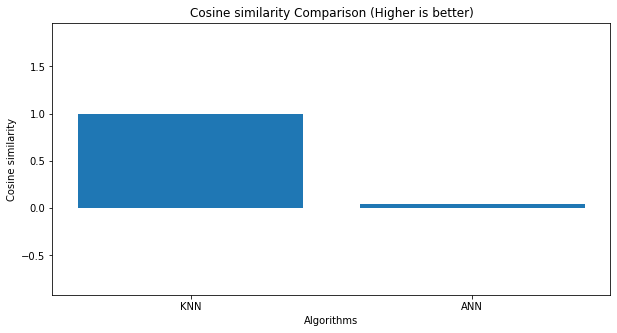

In [66]:
algorithms = ['KNN','ANN']
similarities = [np.mean(average_similarity_knn),np.mean(average_similarity_ann)]
print(similarities)

plt.figure(figsize=[10,5])
plt.bar(algorithms, similarities)
plt.xlabel("Algorithms")
plt.ylabel("Cosine similarity")
plt.ylim([min(similarities)-(max(similarities)-min(similarities)),max(similarities)+(max(similarities)-min(similarities))])
plt.title("Cosine similarity Comparison (Higher is better)")

### Euclidean distance comparision

[1053.841030246905, 38861.47053330807]


Text(0.5, 1.0, 'Euclidean distance Comparison (Lower is better)')

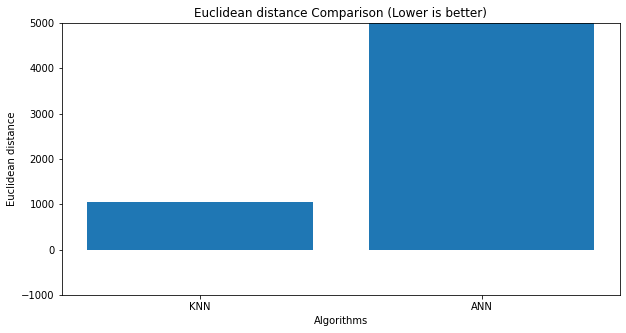

In [67]:
algorithms = ['KNN','ANN']
distance = [np.mean(Euclidean_knn),np.mean(Euclidean_ann)]
print(distance)

plt.figure(figsize=[10,5])
plt.bar(algorithms, distance)
plt.xlabel("Algorithms")
plt.ylabel("Euclidean distance")
plt.ylim(-1000,5000)
plt.title("Euclidean distance Comparison (Lower is better)")